##### Часть 1. Загрузка, изучение и подготовка данных:
* [1. Подключение необходимых библиотек и импортирование функций.](#9.1-bullet)
* [2. Загрузка и изучение файла с данными.](#9.2-bullet)
* [3. Подготовка данных.](#9.3-bullet)

##### Часть 2. Обучение моделей:
* [4. Обучение модели "Линейная регрессия".](#9.4-bullet)
* [5. Обучение модели "Случайный лес".](#9.5-bullet)
* [6. Обучение модели "Градиентный бустинг".](#9.6-bullet)

##### Часть 3. Анализ моделей:
* [7. Анализ модели "Линейная регрессия".](#9.7-bullet)
* [8. Анализ модели "Случайный лес".](#9.8-bullet)
* [9. Анализ модели "Градиентный бучтинг".](#9.9-bullet)
* [10. Вывод.](#9.10-bullet)


## Часть 1. Загрузка, изучение и подготовка данных. 

<a id='9.1-bullet'></a> 
### 1. Подключение необходимых библиотек и импортирование функций. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor

pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = None

RANDOM_STATE = 123456
SEARCH_DEPTH = 'low'

<a id='9.2-bullet'></a> 
### 2. Загрузка и изучение файла с данными. 

In [2]:
try:
    data = pd.read_csv('/datasets/autos.csv')
except:
    data = pd.read_csv('../datasets/autos.csv')

In [3]:
display(data.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Выведем общую информацию о данных в таблице *data*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Всего в таблице 16 столбцов с типами данных *int64* и *object*

Информация, содержащаяся в столбцах:

* DateCrawled — дата скачивания анкеты из базы
* Price — цена (евро)
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* NotRepaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

Посмотрим в каких столбцах имеются пропуски:

In [6]:
print('Имеются пропуски в столбцах:')
for column in data.columns:
    count = data[column].isna().sum()
    if count > 0:
        print(f'{column} - {count} ({count/data.shape[0]:.2%})')

Имеются пропуски в столбцах:
VehicleType - 37490 (10.58%)
Gearbox - 19833 (5.60%)
Model - 19705 (5.56%)
FuelType - 32895 (9.28%)
NotRepaired - 71154 (20.08%)


Категориальные признаки: VehicleType, Gearbox, Model, FuelType, Brand, NotRepaired, PostalCode

Посмотрим какие категории в каждой из этих признаков.

In [7]:
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [8]:
for column in categorical_features:
    values = data[column].unique()
    print(f'{column} ({len(values)}):')
    print(values)

VehicleType (9):
[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Gearbox (3):
['manual' 'auto' nan]
Model (251):
['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan'

Численные признаки: Price, RegistrationYear, Power, Kilometer, RegistrationMonth, NumberOfPictures

Посмотрим распределение этих признаков.

In [9]:
def build_hist(series, title='', xlabel='', bins=50, figsize=(12, 8)):
    fig = plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot()
    series.hist(bins=bins)
    #sns.histplot(series, bins=bins, kde=True, color='red')
    ax.grid()
    plt.gca().set(xlabel=xlabel, ylabel='Частота')
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title(title, fontsize=16)
    plt.show()

In [10]:
numerical_features = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'NumberOfPictures', 'PostalCode']

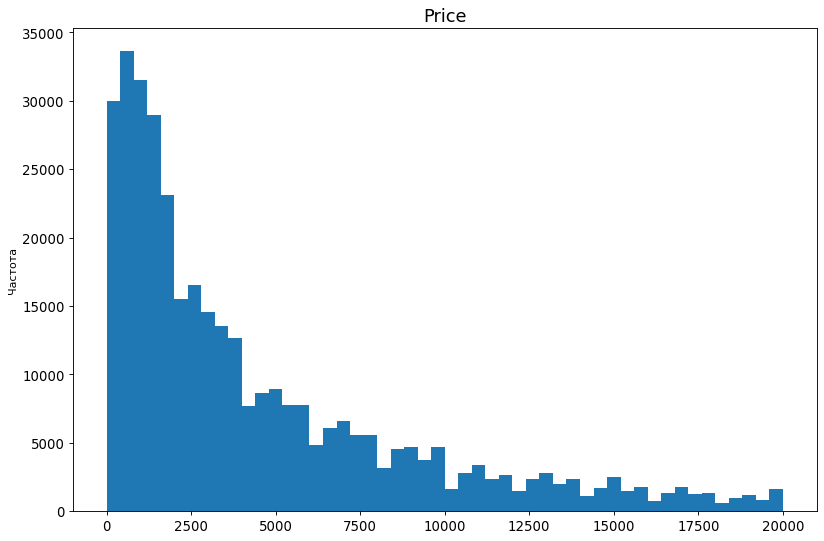

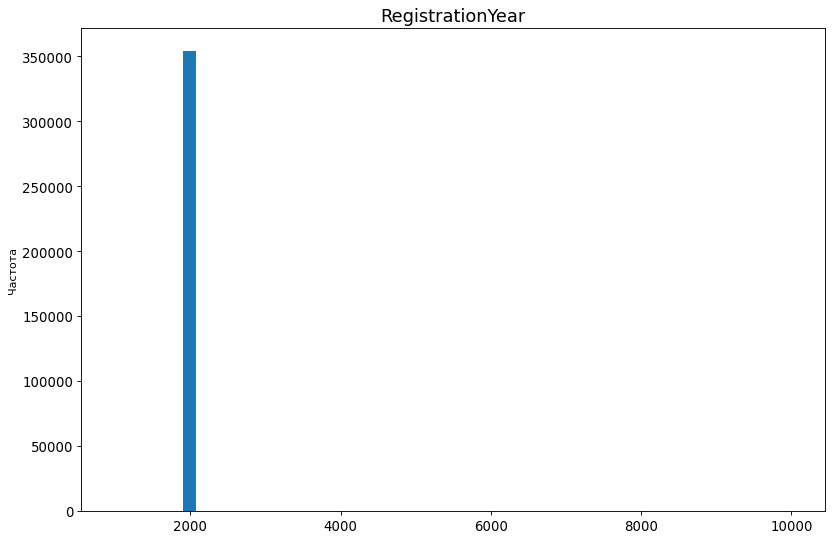

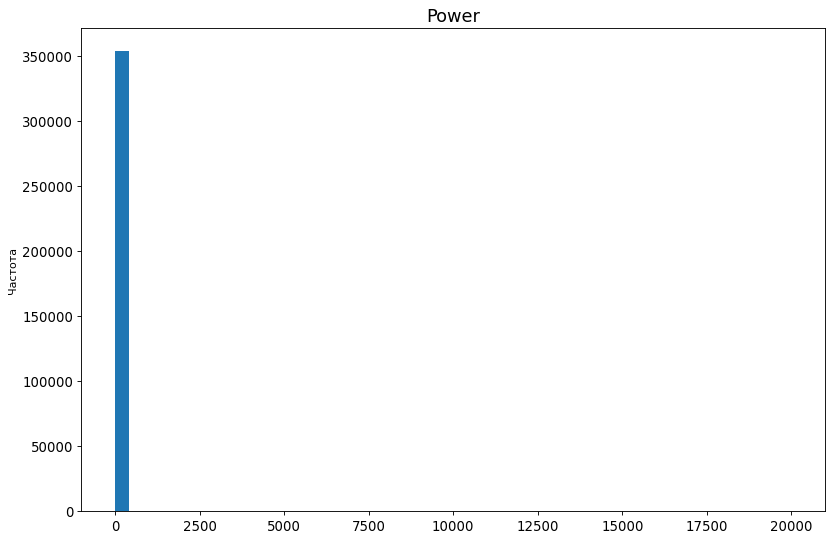

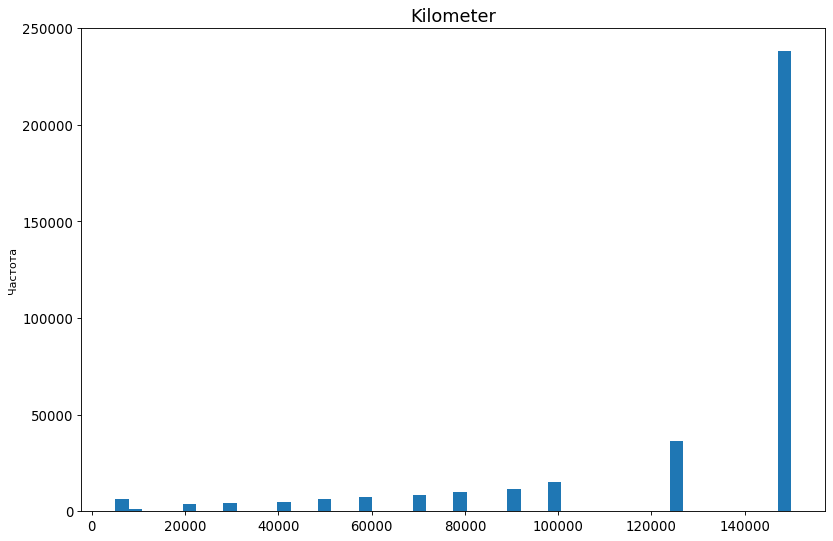

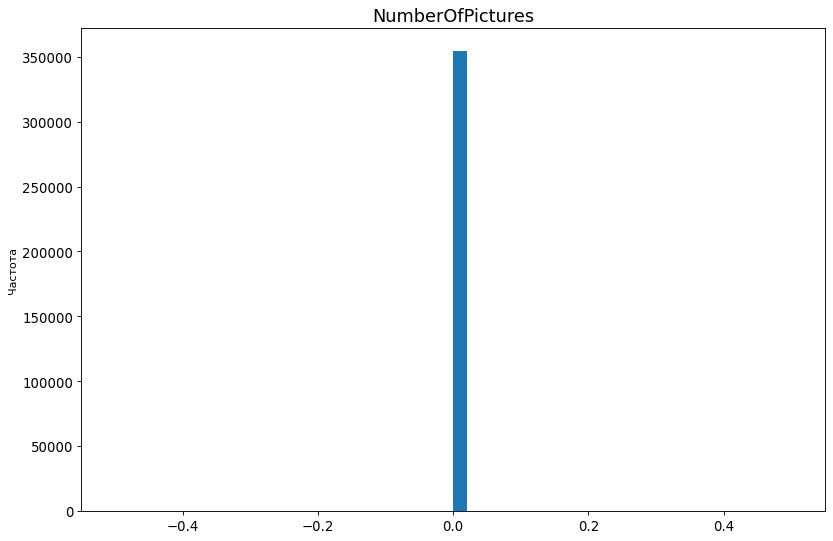

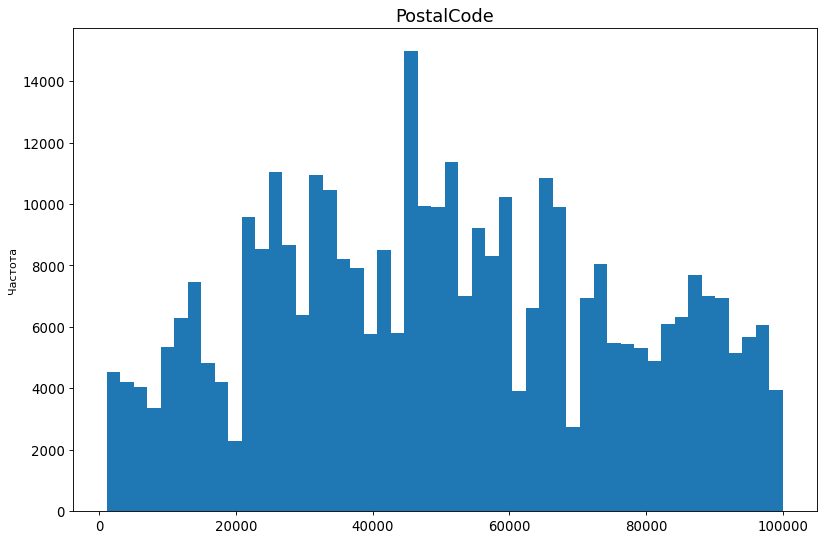

In [11]:
for column in numerical_features:
    build_hist(data[column], title=column)

В столбце *RegistrationYear* есть явные выбросы и от них надо избавиться.

В столбце *Power* тоже есть явное преувеличение мощности автомобилей.

Столбец *NumberOfPictures* бессмысленен, так как в нём одни нули.

Признак *PostalCode — почтовый индекс владельца анкеты (пользователя)*  думаю не имеет никакого отношения к автомобилю, если только косвенно указывать на 

Проанализируем остальные признаки:

* DateCrawled (дата скачивания анкеты из базы) - не имеет смысла с точки зрения обучения модели, так как никак не характеризует автомобиль.

* DateCreated (дата создания анкеты) - данный параметр имеет смысл превратить в разницу между годом создания анкеты и годом регистрации автомобиля, но только если все анкеты не были сделаны в один год. Кроме того, этот параметр поможет бороться с выбросами в столбце RegistrationMonth.

* LastSeen (дата последней активности пользователя) - не имеет смысла, так как для нового клиента это значение отсуствует.

* RegistrationMonth (месяц регистрации автомобиля) - точно не имеет смысла для предсказания его стоимости на вторичном рынке.

Из анализа полученных данных можно сделать вывод по пунктам их дальнейшей подготовки:
 - избавиться от ненужных столбцов: *DateCrawled, LastSeen и NumberOfPictures, RegistrationMonth*.
 - избавиться от выбросов в столбцах RegistrationYear и Power
 - преобразовать столбец *DateCreated* в *AutoAge*
 - избавиться от пропусков

<a id='9.3-bullet'></a> 
### 3. Подготовка данных. 

В данном пункте мы зделаем преобразования описанные в предыдущем пункте.

#### - избавимся от ненужных столбцов: *DateCrawled, LastSeen и NumberOfPictures*

In [12]:
data = data.drop(['DateCrawled', 'LastSeen', 'NumberOfPictures', 'RegistrationMonth'], axis=1)

In [13]:
display(data.head(1))

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,DateCreated,PostalCode
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435


#### - избавимся от выбросов в столбце RegistrationYear

Для этого, в первую очередь, посмотрим на то какие значения этого признака встречаются в выборке.

In [14]:
data['RegistrationYear'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

Думаю что верхний предел можно обозначить для каждого объявления как DateCreated (дата создания анкеты), а вот нижний предел начать с 1910 года. Раритеты могут встречаться. Посмотрим сколько объявлений окажется за пределами этих рамок.

In [15]:
count = data[(data.RegistrationYear < 1910) | 
     (data.RegistrationYear > pd.to_datetime(data['DateCreated'], format='%Y-%m-%d').dt.year)].DateCreated.count()
print(f'Нереальные года - {count} ({count/data.shape[0]:.2%})')

Нереальные года - 14596 (4.12%)


Так как год производства автомобиля имеет большое значение, а подбирать год даже опираясь на модель очень проблематично (многие модели выходят по многу лет в различных рестайлингах), то лучше удалить объекты с неадекватным годом регистрации автомобиля.

In [16]:
data = data.drop(data[(data.RegistrationYear < 1910) | 
     (data.RegistrationYear > pd.to_datetime(data['DateCreated'], format='%Y-%m-%d').dt.year)].index)

Посмотрим новое распределение по годам регистрации автомобиля:

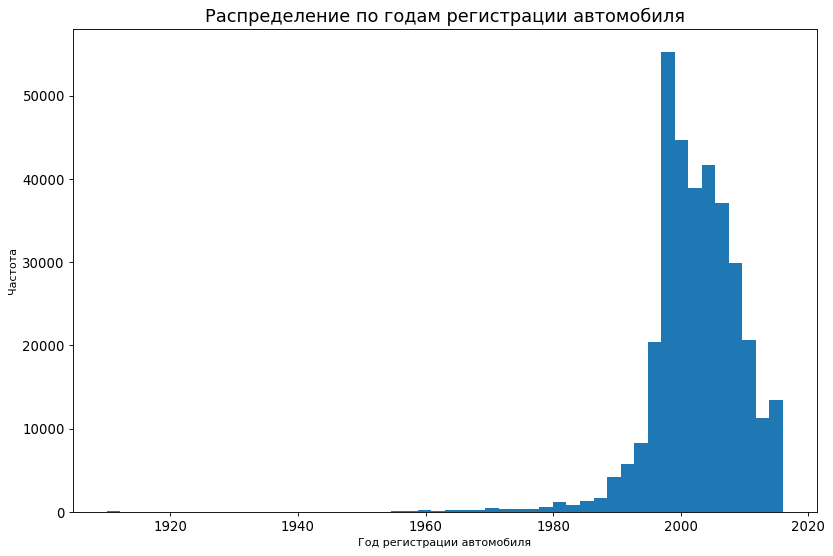

In [17]:
build_hist(data.RegistrationYear, title='Распределение по годам регистрации автомобиля', xlabel='Год регистрации автомобиля')

Ящик с усами поможет отбросить выбросы слева.

In [18]:
def plot_show(xlabel, ylabel, title):
    plt.gca().set(xlabel=xlabel, ylabel=ylabel)
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title(title, fontsize=16)
    plt.show()

def build_boxplot(df, x=None, y=None, xlabel='', ylabel='', title='', xlim=None):
    fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot()
    sns.violinplot(data=df, orient='horizontal')
    plt.xlim(xlim)
    ax.grid()
    plot_show(xlabel, ylabel, title)

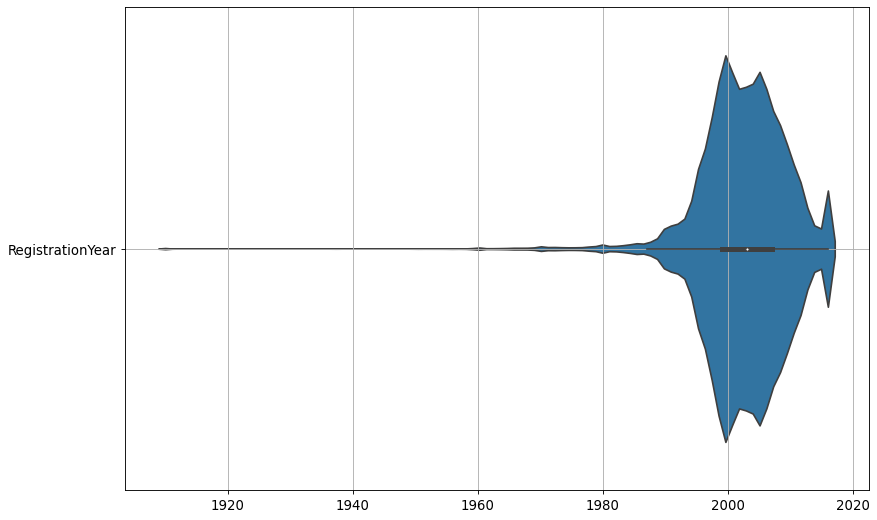

In [19]:
build_boxplot(data[['RegistrationYear']])

Хоть график и говорит о том что до 1980 года можно считать выбросами, но всё же оставим всё с датой регистрации после 1960 года. Всё же их после этого года заметно больше чем до. Посмотрим сколько их:

In [20]:
count = data[(data.RegistrationYear < 1960)].DateCreated.count()
print(f'Года регистрации до 1960 - {count} ({count/data.shape[0]:.2%})')

Года регистрации до 1960 - 356 (0.10%)


Ещё 0.1%. Не думаю что стоит ради этого их оставлять.

In [21]:
data = data.drop(data[(data.RegistrationYear < 1960)].index)

Итоговое распределение:

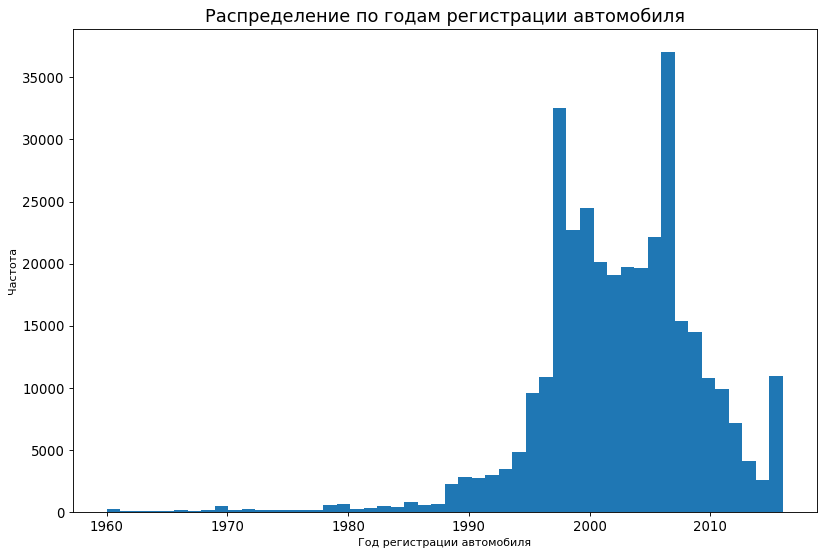

In [22]:
build_hist(data.RegistrationYear, title='Распределение по годам регистрации автомобиля', xlabel='Год регистрации автомобиля')

Распределение назовём **"рок-н-ролл жив"** :)

#### - избавимся от выбросов в столбце Power

Так как мы заранее не можем знать в каких пределах варьировалась мощность двигателя у той или иной модели, то задачу разделим на 2 этапа:
- Разобьём на модели
- Посчитаем квартили и найдём максимальное и минимальное значение внутри отрезка $[Q1 - 1.5*IRQ - 1; Q3 + 1.5*IRQ + 1]$.
- Перенесём всё что выше к найденному максимуму, а всё что ниже к найденному минимуму.

Перед тем как это делать. Разберёмся с пропусками в столбце *Model*. У нас среди названий моделей присутствует *other*, посмотрим с какими марками такай "модель" встречается.

In [23]:
print(data[data.Model == 'other'].Brand.unique())

['volkswagen' 'mercedes_benz' 'hyundai' 'honda' 'mitsubishi' 'opel' 'fiat'
 'suzuki' 'lancia' 'mazda' 'nissan' 'toyota' 'chevrolet' 'renault'
 'peugeot' 'kia' 'citroen' 'ford' 'chrysler' 'bmw' 'audi' 'jaguar' 'skoda'
 'porsche' 'rover' 'smart' 'saab' 'alfa_romeo' 'mini' 'seat' 'volvo'
 'trabant' 'lada' 'daewoo' 'jeep' 'daihatsu' 'subaru' 'dacia' 'land_rover']


Во многих брендах встречаетс "модель" other, Значит все пропуски в столбце *Model* заменим на *other* вне зависимости от марки авто.

In [24]:
data.Model = data.Model.fillna('other')

В алгоритм избавления от выбросов в столбце Power добавим момент, что если модель other и Power выходит за указанные выше пределы для марки автомобиля, то удаляем такую запись. Потому что запись без модели с непонятной мощностью двигателя это что-то странное.

In [25]:
def get_true_powers(powers):
    Q1 = powers.describe()['25%']
    Q3 = powers.describe()['75%']
    return powers[(powers > 0) & 
                  (powers > Q1 - 1.5 * (Q3 - Q1) - 1) & 
                  (powers < Q3 + 1.5 * (Q3 - Q1) + 1)]
    
def remove_invalid_others(df):
    df1 = df.copy()
    for brand in df1.Brand.unique():
        true_powers = get_true_powers(df1[df1.Brand == brand].Power)
        df1 = df1.drop(df1[(df1.Brand == brand) & (df1.Model == 'other') & ((df1.Power < true_powers.min()) | (df1.Power > true_powers.max()))].index)
    return df1
    
def correction_power(df):
    models_powers = {}
   
    def get_true_power(row):
        result = min(max(row.Power, models_powers[row.Model]['min']), models_powers[row.Model]['max'])
        return result
    
    for model in df.Model.unique():
        models_powers[model] = {}
        true_powers = get_true_powers(df[df.Model == model].Power)
        models_powers[model]['min'] = true_powers.min()
        models_powers[model]['max'] = true_powers.max()
        
    return df.apply(get_true_power, axis=1) 

Сначала дропнем все other-модели с непонятной мощностью, которая находится в зоне выбросов для бренда.

In [26]:
data = remove_invalid_others(data)

Скорректируем мощности для каждой модели

In [27]:
data.Power = correction_power(data) 

Посмотрим на распределение мощностей

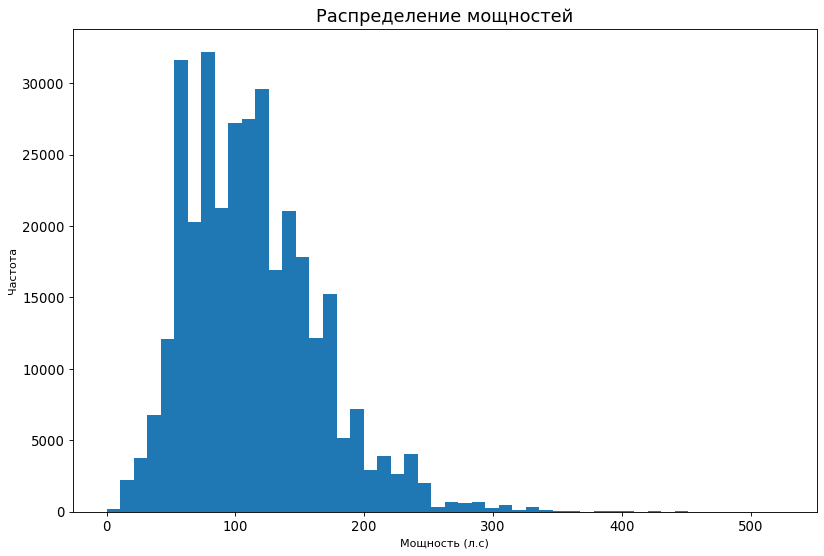

In [28]:
build_hist(correction_power(data), title='Распределение мощностей', xlabel='Мощность (л.с)')

Если остались нули, значит модель встречалась только с нулевой мощностью. Если такие есть, то их надо убрать.

In [29]:
display(data[data.Power == 0])
data[data.Power == 0].pivot_table(index=['Brand', 'Model'], values='Power', aggfunc='count')

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,DateCreated,PostalCode
234296,3800,wagon,1978,manual,0,serie_1,30000,gasoline,land_rover,NaN,2016-03-30 00:00:00,49824
280216,0,NaN,1970,NaN,0,serie_1,100000,petrol,land_rover,NaN,2016-04-02 00:00:00,88634


,,Power
Brand,Model,
land_rover,serie_1,2


Land Rover serie 1. Всего 2 штуки. Удалим их.

In [30]:
data = data.drop(data[data.Power == 0].index)

#### - преобразуем столбец *DateCreated* в *AutoAge*

In [31]:
data['AutoAge'] = pd.DatetimeIndex(pd.to_datetime(data.DateCreated, format='%Y-%m-%d')).year - data.RegistrationYear

In [32]:
data = data.drop(['DateCreated'], axis=1)

#### - избавимся от пропусков в столбцах VehicleType, Gearbox, FuelType, NotRepaired.

**VehicleType (тип кузова)** имеет вариант 'other'. Заменим все пропуски на это значение. По сути это одно и то же.

In [33]:
data.VehicleType = data.VehicleType.fillna('other')

Посмотрим какие модели встречаются с кузовом "other":

In [34]:
data[data.VehicleType == 'other'].Model.unique()

array(['golf', 'polo', 'clio', 'kadett', 'kangoo', 'other', 'corsa',
       '5er', 'vito', 'astra', 'ka', 'insignia', 'civic', '3er', '100',
       'punto', 'fabia', 'almera', 'caddy', 'fiesta', 'jazz', 'modus',
       'c1', 'fox', 'c_max', '2_reihe', 'combo', '1er', 'galaxy',
       'transporter', 'zafira', 'qashqai', 'twingo', 'lanos', 'megane',
       'i_reihe', 'b_klasse', 'leon', 'vectra', 'touran', 'transit',
       'meriva', 'rx_reihe', 'carnival', 'fusion', 'ibiza', 'a3',
       'cordoba', 'mondeo', 'sharan', 'v70', 'e_klasse', 'c_reihe',
       'escort', 'kaefer', 'a6', 'a_klasse', 'calibra', 'clk', 'sprinter',
       'slk', 'ptcruiser', 'espace', '4_reihe', 'fortwo', 'matiz',
       'passat', 'scirocco', 'berlingo', 'a4', 'primera', 'c_klasse',
       'freelander', 'focus', 'tigra', 'samara', 'scenic', 'agila',
       'swift', 'jetta', 'auris', '500', 'avensis', 'mx_reihe', 'v40',
       '3_reihe', 'aygo', 's_max', 'ducato', 'q7', 'stilo', '6_reihe',
       'lupo', 'omega', '

Опять модель "other". Думаю такие модели с неизвестным кузовом стоит исключить из выборки.

In [35]:
data = data.drop(data[(data.VehicleType == 'other') & (data.Model == 'other')].index)

**Gearbox (тип коробки передач)** - думаю что пропуски это механика, как классический вариант коробки.

In [36]:
data.Gearbox = data.Gearbox.fillna('manual')

**FuelType** имеет вариант "other", на него пропуски и заменим.

In [37]:
data.FuelType = data.FuelType.fillna('other')

Удалим записи где и FuelType = 'other' и один из параметров (Model или VehicleType) тоже имеет значение 'other', чтобы сократить количество неопределённых параметров в одном объекти до максимум одного.

In [38]:
data = data.drop(data[(data.FuelType == data.VehicleType) | (data.FuelType == data.Model)].index)

**NotRepaired (была машина в ремонте или нет)**. Думаю пропуск может говорить о том что машина не была в ремонте. В любом случае, в этом параметре мы можем рассчитывать только на честность продавца, а нет и пропук это со стороны продавца - нет.

In [39]:
data.NotRepaired = data.NotRepaired.fillna('no')

Посмотрим что стал из себя представлять датафрейм:

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316323 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             316323 non-null  int64 
 1   VehicleType       316323 non-null  object
 2   RegistrationYear  316323 non-null  int64 
 3   Gearbox           316323 non-null  object
 4   Power             316323 non-null  int64 
 5   Model             316323 non-null  object
 6   Kilometer         316323 non-null  int64 
 7   FuelType          316323 non-null  object
 8   Brand             316323 non-null  object
 9   NotRepaired       316323 non-null  object
 10  PostalCode        316323 non-null  int64 
 11  AutoAge           316323 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 31.4+ MB


## Часть 2. Обучение моделей. 

Создадим списки численных и категориальных столбцов:

In [41]:
numerical_columns = ['RegistrationYear', 'Power', 'Kilometer', 'PostalCode', 'AutoAge']
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

#### Классы и методы для решения задачи:

In [42]:
class ab_ProgressBar():
    
    def __init__(self, max=0):
        self.max_count = max
        self.spinner_state = 0
        self.progress = 0
        self.start_time = time.perf_counter()
        self.progress_step = 100 / self.max_count
        self.draw()
    
    def get_diff_time(self, t):
        return int(t // 3600), int((t // 60) % 60), int(t % 60)
    
    def get_time_string(self):
        return '{0[0]:02}:{0[1]:02}:{0[2]:02}'.format(self.get_diff_time(time.perf_counter() - self.start_time))
    
    def get_left_time_string(self):
        cur_time = time.perf_counter() - self.start_time
        try:
            return '{0[0]:02}:{0[1]:02}:{0[2]:02}'.format(self.get_diff_time(max(0, cur_time * (100 - self.progress) / self.progress)))
        except:
            return ' - '
            
    def get_fill_progress(self):
        count = int(self.progress / 2)
        return '.' * count + ' ' * int(50 - count)
    
    def draw(self):
        print(f'[{self.progress:.1f}%][time: {self.get_time_string()}][{self.get_fill_progress()}][time left: {self.get_left_time_string()}]', end='\r')
 
    def increment(self, count=1):
        self.draw()
        self.progress += self.progress_step * count
    
    def stop(self):
        print()

Функция для преобразования категориальных признаков в численные одним из методов ('OHE' или 'OrdinalEncoder')

In [43]:
def category_to_numeric(df, metod='OHE', columns=[]):
    if metod == 'OHE':
        return pd.get_dummies(df, drop_first=True)
    encoder = OrdinalEncoder()
    result = df.copy()
    result[columns] = encoder.fit_transform(result[columns])
    return result

Функция для выделения целевого признака и разобивки выборки на тестовую и тренировочную

In [44]:
# train_features, test_features, train_target, test_target
def split_data(df, part=None):
    result = train_test_split(df.drop(['Price'], axis=1), 
                                df['Price'], test_size=0.25, 
                                random_state=RANDOM_STATE
                               )
    if part == 'train':
        return result[0], result[2]
    elif part == 'test':
        return result[1], result[3]
    return result

Переменная для параметров моделей

In [45]:
models = pd.DataFrame()

<a id='9.4-bullet'></a> 
### 4. Обучение модели "Линейная регрессия". 

Начнём с линейной регрессии. Для линейной регрессии не плохо провести стандартизацию.

In [46]:
def best_score_LinearRegression(df, cv=5):
    progress_bar = ab_ProgressBar(cv - 1)
    
    class ab_Scaler(StandardScaler):
        def __init__(self, *, columns=None, copy=True, with_mean=True, with_std=True):
            self.columns = columns
            super().__init__(copy=copy, with_mean=with_mean, with_std=with_std)
            
        def fit(self, X, y=None):
            progress_bar.increment()
            return super().fit(X[self.columns], y=y)
        
        def transform(self, X, copy=None):
            X[self.columns] = super().transform(X[self.columns], copy=copy)
            return X 
        
    X, y = split_data(category_to_numeric(df), 'train')
    pipe = Pipeline([('normalizer', 
                      ab_Scaler(columns=numerical_columns)), 
                     ('classifier', LinearRegression())])
    RMSE = abs(sum(cross_val_score(pipe, X, y, cv=cv, scoring='neg_mean_squared_error')) / 5) ** 0.5
    progress_bar.stop()
    return {
        'Model': 'LinearRegression', 
        'RMSE': RMSE
           }

In [47]:
models = models.append(best_score_LinearRegression(data), ignore_index=True)
print('Результат:') 
display(models.tail(1))

[100.0%][time: 00:00:24][..................................................][time left: 00:00:00]
Результат:


,Model,RMSE
0,LinearRegression,2626.750709


<a id='9.5-bullet'></a> 
### 5. Обучение модели "Случайный лес". 

In [48]:
def best_score_RandomForestRegressor(df, parameters, cv=5):
    progress_bar = ab_ProgressBar(cv * sum(parameters['max_depth']) * sum(parameters['n_estimators']))
    
    class ab_RandomForestRegressor(RandomForestRegressor):

        def fit(self, X, y):
            progress_bar.increment(self.n_estimators * self.max_depth)
            return super().fit(X, y)
        
    
    X, y = split_data(category_to_numeric(df, 'Ordinal', columns=categorical_columns), 'train')
    grid = GridSearchCV(ab_RandomForestRegressor(random_state=RANDOM_STATE), 
                        param_grid=parameters, cv=cv, scoring='neg_mean_squared_error')
    DecisionTree_model = grid.fit(X, y)
    progress_bar.stop()
    return {
        'Model': 'RandomForestRegressor', 
        'RMSE': abs(grid.best_score_) ** 0.5,
        'max_depth': grid.best_params_['max_depth'],
        'n_estimators': grid.best_params_['n_estimators']
           }

In [49]:
if SEARCH_DEPTH == 'full':
    parameters = {'max_depth': range(1, 30, 4), 'n_estimators': range(10, 101, 10)}
else:
    parameters = {'max_depth': [21], 'n_estimators': [100]}
    
models = models.append(
    best_score_RandomForestRegressor(data, parameters=parameters), ignore_index=True)
print('Результат:') 
display(models.tail(1))

[100.0%][time: 00:07:29][..................................................][time left: 00:00:00]
Результат:


,Model,RMSE,max_depth,n_estimators
1,RandomForestRegressor,1679.308218,21.0,100.0


<a id='9.6-bullet'></a> 
### 6. Обучение модели "Градиентный бустинг". 

In [50]:
def best_score_LGBMRegressor(df, parameters, cv=5):
    progress_bar = ab_ProgressBar(len(parameters['max_depth']) * len(parameters['n_estimators']) * len(parameters['boosting_type']) * cv)

    class ab_LGBMRegressor(LGBMRegressor):
        
        def fit(self, X, y):
            progress_bar.increment()
            return super().fit(X, y)
    
    
    X, y = split_data(category_to_numeric(df, 'Ordinal', columns=categorical_columns), 'train')
    
    grid = GridSearchCV(ab_LGBMRegressor(random_state=RANDOM_STATE), param_grid=parameters, cv=cv, scoring='neg_mean_squared_error')
    grid.fit(X, y)
    progress_bar.stop()
    return {
        'Model': 'LGBMRegressor', 
        'RMSE': abs(grid.best_score_) ** 0.5,
        'max_depth': grid.best_params_['max_depth'],
        'n_estimators': grid.best_params_['n_estimators'],
        'boosting_type': grid.best_params_['boosting_type']
           }

In [51]:
if SEARCH_DEPTH == 'full':
    parameters = {'max_depth': range(1, 30, 4), 'n_estimators': range(10, 101, 10), 'boosting_type': ('gbdt', 'dart', 'goss')}
else:
    parameters = {'max_depth': [17], 'n_estimators': [100], 'boosting_type': ['goss']}
models = models.append(
    best_score_LGBMRegressor(data, parameters=parameters), ignore_index=True)
print('Результат:') 
display(models.tail(1))

[100.0%][time: 00:00:09][..................................................][time left: 00:00:00]
Результат:


,Model,RMSE,max_depth,n_estimators,boosting_type
2,LGBMRegressor,1763.972964,17.0,100.0,goss


Вот весь список получившихся молучших моделей, отсортированных по убыванию качества предсказания.

In [52]:
display(models.sort_values('RMSE'))

,Model,RMSE,max_depth,n_estimators,boosting_type
1,RandomForestRegressor,1679.308218,21.0,100.0,NaN
2,LGBMRegressor,1763.972964,17.0,100.0,goss
0,LinearRegression,2626.750709,NaN,NaN,NaN


## Часть 3. Анализ моделей. 

Функция для получения параметров для оценки качества модели

In [53]:
def get_model_quality(df, model, category_to_numeric_metod='OHE', category_columns=[]):
    result = {}
    X_train, X_test, y_train, y_test = split_data(category_to_numeric(df, metod=category_to_numeric_metod, columns=category_columns))
    qtime = time.perf_counter()
    model.fit(X_train, y_train)
    result['Скорость обучение'] = time.perf_counter() - qtime
    qtime = time.perf_counter()
    result['Качество предсказания'] = mean_squared_error(y_test, model.predict(X_test)) ** 0.5
    result['Скорость предсказания'] = time.perf_counter() - qtime
    return result

<a id='9.7-bullet'></a> 
### 7. Анализ модели "Линейная регрессия". 

Узнаем качество предсказания линейной регрессии на тестовой выборке, скорость предсказания и время обучения.

In [54]:
print(get_model_quality(data, Pipeline([('normalizer', StandardScaler()), ('classifier', LinearRegression())])))

{'Скорость обучение': 11.734976500000016, 'Качество предсказания': 2632.6948039495587, 'Скорость предсказания': 0.6444172000000208}


<a id='9.8-bullet'></a> 
### 8. Анализ модели "Случайный лес". 

Узнаем качество предсказания модели "случайный лес" на тестовой выборке, скорость предсказания и время обучения.

In [55]:
print(get_model_quality(data, RandomForestRegressor(max_depth=21, n_estimators=100, random_state=RANDOM_STATE), 'Ordinal', categorical_columns))

{'Скорость обучение': 106.98719860000006, 'Качество предсказания': 1658.6081122631097, 'Скорость предсказания': 2.3656473999999434}


<a id='9.9-bullet'></a> 
### 9. Анализ модели "Градиентный бустинг". 

Узнаем качество предсказания модели "Градиентный бустинг" на тестовой выборке, скорость предсказания и время обучения.

In [56]:
print(get_model_quality(data, LGBMRegressor(max_depth=17, n_estimators=100, boosting_type='goss', random_state=RANDOM_STATE), 'Ordinal', categorical_columns))

{'Скорость обучение': 1.1584219999999732, 'Качество предсказания': 1786.1818873552809, 'Скорость предсказания': 0.17943909999996777}


<a id='9.10-bullet'></a> 
### 10. Вывод. 

В результате проведённого исследования были получены следующие результаты:
- самое высокое качество предсказания у модели регрессии "случайный лес" - RMSE-метрика составляет 1658, но скорость обучения и скорость предсказания самые маленькие. На обучение тратится больше потлутора минут, а на предсказание 2, 5 секунды
- самую высокую скорость обучения и предсказания показала модель регрессии "градиентный бустинг" - 1,1 секунды и 0,18 секунд, соответственно. Качество предсказания немного проигрывает модели "случайный лес", но проигрыш составляет менее 8%, в то время как по скорости обучения эта модель лучше модели "случайный лес" на 2 порядка, а по скорости предсказания на 1 порядок. Это серьёзное преимущество.
- модель линейной регрессии по качеству предсказания значительно уступает другим моделям и проигрывает по скорости "градиентному бустингу" в несколько раз.